# Logistic Regression

Logistic regression is used for classification to model the probability of an instance belonging to a certain class. It applies a linear regression to the probabilities but to avoid a probability of less than 0 or greater than 1 a *logistic function* is applied to it which gives:


\begin{equation*}
p(X)=\frac{e^{\theta_0+\theta_1 X}}{1+e^{\theta_0+\theta_1 X}} = \frac{1}{1+e^{-(\theta_0+\theta_1 X})}
\end{equation*}



Here we can plot the logistic 'S' curve:

In [1]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
X = np.linspace(-2,2,1000)
y = np.exp(4*X)/(1+np.exp(4*X))

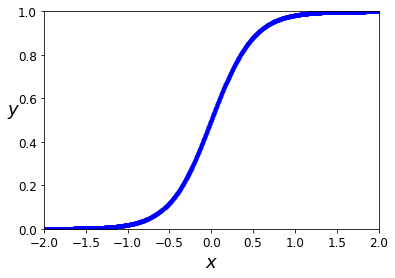

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-2, 2, 0, 1])
plt.show()

By rewriting our logistic function we can derive the following formula:
    
\begin{equation*}
\log \Bigg(\frac{p(x}{1-p(x)}\Bigg)=\theta_0+\theta_1 X
\end{equation*}

Where the left hand term is the log of the odds which is called the *log-odds* or *logit*. The odds are ussually used in betting where higher odds means lower probability.

## Estimating the Regression Coefficients with Gradient Descent

Next we will try to find the thetas to create the logistic model. First lets generate some data:

In [4]:
X_1 = 0 + np.random.rand(100,1)
X_2 = 0.5 + np.random.rand(100,1)
X = np.concatenate((X_1, X_2),axis=0)
y_1 = np.zeros((100,1))
y_2 = np.ones((100,1))
y = np.concatenate((y_1, y_2),axis=0)

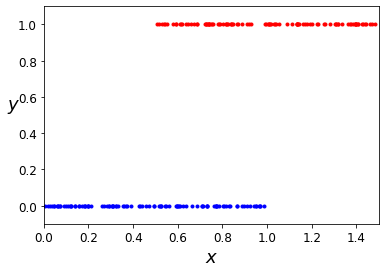

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_1, y_1, "b.")
plt.plot(X_2, y_2, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1.5, -0.1, 1.1])
plt.show()

Now we have our data with two classes: red and blue. It can be shown through taking the derivative of the *logistic cost function* that the gradient of the loss function with respect to the weights are:

\begin{equation*}
\nabla_\theta J(\theta)=\frac{1}{m}X^T(\sigma(\theta X)-y)
\end{equation*}

Using gradient descent we can get our parameters:

In [7]:
eta = 0.1
n_iterations = 1000
m=200

X_b = np.c_[ np.ones(( 200, 1)), X]

thetas = np.random.randn(2,1) #random initialisation

for iteration in range(n_iterations):
    y_hat = np.exp(X_b.dot(thetas))/(1+np.exp(X_b.dot(thetas)))
    gradients = 1/m * X_b.T.dot(y_hat - y)
    thetas -= eta * gradients

print(thetas)

[[-2.68861788]
 [ 3.75572026]]


In [8]:
np.random.seed(42)
X_1 = 0 + np.random.rand(100,1)
X_2 = 0.5 + np.random.rand(100,1)
X = np.concatenate((X_1, X_2),axis=0)
y_1 = np.zeros((100,1))
y_2 = np.ones((100,1))
y = np.concatenate((y_1, y_2),axis=0)

x_new = np.linspace(0,2,200)
x_new_b = np.c_[ np.ones(( 200, 1)), x_new]

y_new = np.exp(x_new_b.dot(thetas))/(1+np.exp(x_new_b.dot(thetas)))

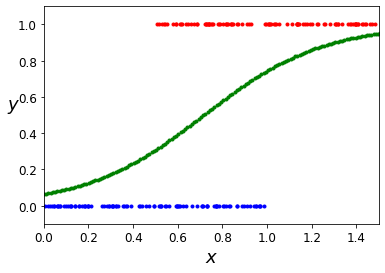

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_1, y_1, "b.")
plt.plot(X_2, y_2, "r.")
plt.plot(x_new, y_new, "g.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1.5, -0.1, 1.1])
plt.show()

## Multiple Logistic Regression

For multiple features the same methodology can be used as for the simple logistic regression and gradient descent can be used to fit multiple features. Now there will simply be more thetas to keep track of.

## Softmax Regression/Multinomial Logistic Regression

Softmax regression aims to classify data containing multiple classes. We can start by generating data:

In [10]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=5)

In [11]:
X_1 = 0 + np.random.rand(100,1)
X_2 = 0.75 + np.random.rand(100,1)
X_3 = 1.5 + np.random.rand(100,1)

y_1 = 3+9*np.random.rand(100,1)
y_2 = 3+9*np.random.rand(100,1)
y_3 = 3+9*np.random.rand(100,1)

z_1 = np.zeros((100,1))
z_2 = np.ones((100,1))
z_3 = np.zeros((100,1))
z_3.fill(2)

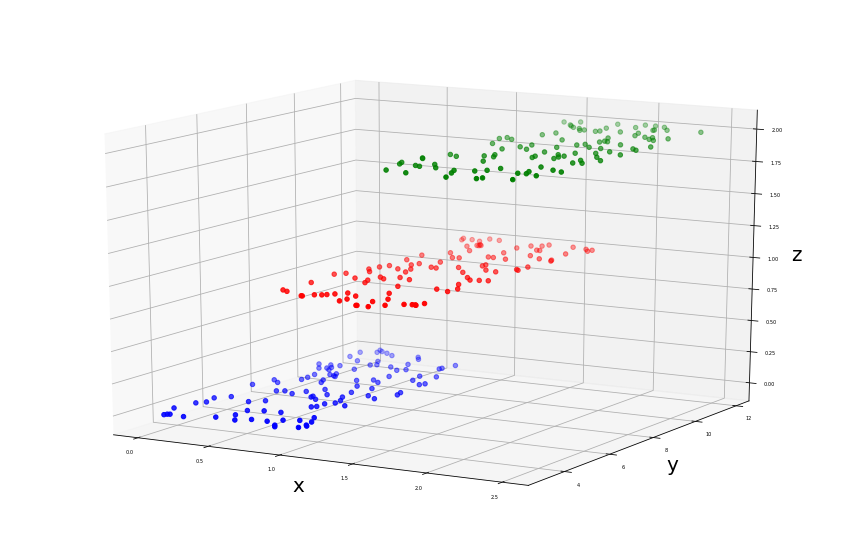

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_1, y_1, z_1, c='b')
ax.scatter(X_2, y_2, z_2, c='r')
ax.scatter(X_3, y_3, z_3, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(15)
plt.show()

The softmax classifier works by applying a linear combination of features into a softmax function which outputs the probability of each class being the correct one:

$$\sigma(X)_k=\frac{e^{\theta_k X}}{\sum^{K}_{j=1}e^{\theta_j X}}$$

The loss function to update the thetas is called the *cross entropy cost function* where the gradient for each class k is:

\begin{equation*}
\nabla_{\theta , k} J(\theta)=\frac{1}{m}X^T(\sigma(X)_k-y)
\end{equation*}

Now let's implement this for batch gradient descent:

In [13]:
#convert the data into matrix form and generate label matrix
X = np.concatenate((X_1, X_2),axis=0)
X = np.concatenate((X, X_3),axis=0)

y = np.concatenate((y_1, y_2),axis=0)
y = np.concatenate((y, y_3),axis=0)

z_1a = np.ones((100,1))
z_1b = np.zeros((100,1))
z_1c = np.zeros((100,1))

z_2a = np.zeros((100,1))
z_2b = np.ones((100,1))
z_2c = np.zeros((100,1))

z_3a = np.zeros((100,1))
z_3b = np.zeros((100,1))
z_3c = np.ones((100,1))

z_1 = np.concatenate((z_1a, z_1b),axis=0)
z_1 = np.concatenate((z_1, z_1c),axis=0)

z_2 = np.concatenate((z_2a, z_2b),axis=0)
z_2 = np.concatenate((z_2, z_2c),axis=0)

z_3 = np.concatenate((z_3a, z_3b),axis=0)
z_3 = np.concatenate((z_3, z_3c),axis=0)

z = np.concatenate((z_1, z_2),axis=1)
z = np.concatenate((z, z_3),axis=1)

In [14]:
eta = 0.1
n_iterations = 10000
m=300

X_b = np.c_[ np.ones(( 300, 1)), X]
X_b = np.c_[X_b, y]

thetas = np.random.randn(3,3) #random initialisation

for iteration in range(n_iterations): #batch gradient descent
    z_hat = np.exp(X_b.dot(thetas))/np.exp(X_b.dot(thetas)).sum(axis=1, keepdims=True)
    gradients = 1/m * X_b.T.dot(z_hat - z)
    thetas -= eta * gradients

print(thetas)

[[  8.3063056    0.39616013 -10.13262654]
 [ -8.58600274  -0.39417435   6.19340757]
 [  0.36222662   0.48009134   0.45794521]]


In [15]:
z_final = np.argmax(np.exp(X_b.dot(thetas))/np.exp(X_b.dot(thetas)).sum(axis=1, keepdims=True),axis=1)
print(z_final)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 1 0 1
 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 0 1 1
 0 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 0 2 2 1 1 1 1 2 1 1 2 1 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 1 2
 2 2 2 1]


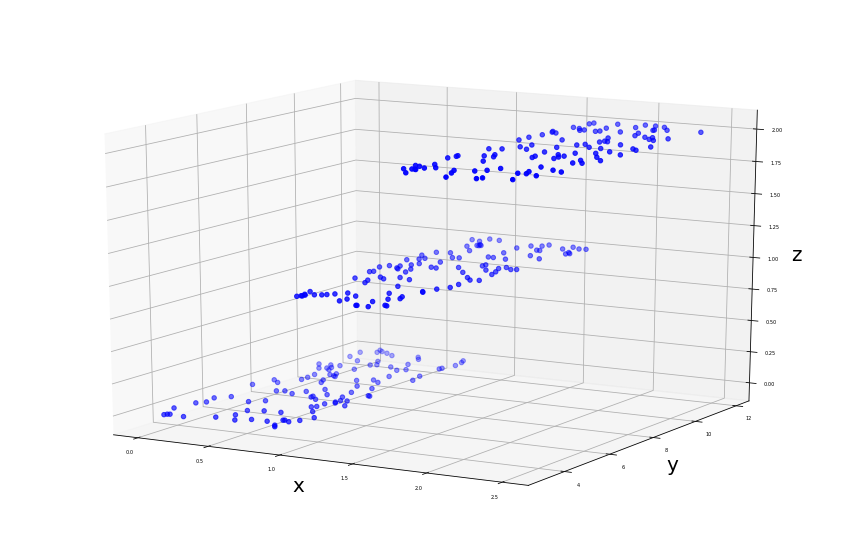

In [16]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X, y, z_final, c='b')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(15)
plt.show()

It looks almost like the original which means the algorithm as converged.